In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_props.csv')
test = pd.read_csv('test_props.csv')
train.describe()

,CalcExactMolWt,CalcNumLipinskiHBD,CalcNumLipinskiHBA,CalcNumHBD,CalcNumHBA,CalcNumRotatableBonds,CalcNumRings,CalcNumAromaticRings,CalcNumSaturatedRings,CalcNumHeterocycles,...,CalcNumAliphaticRings,CalcNumAliphaticHeterocycles,CalcNumAliphaticCarbocycles,CalcNumHeteroatoms,CalcNumAmideBonds,CalcFractionCSP3,CalcChi1v,CalcChi2v,CalcChi3v,CalcChi4v
count,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,...,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000,907213.000000
mean,432.241597,1.975757,7.080828,1.744034,5.990339,7.513682,3.993040,2.964585,0.773148,2.273022,...,1.028455,0.734335,0.294121,8.567238,0.900958,0.307526,8.423140,6.024251,3.946151,2.562119
std,146.421637,2.318451,3.542866,1.902865,2.624570,5.299972,1.328355,1.144499,0.910328,1.326109,...,1.006387,0.799189,0.642612,3.915585,1.344852,0.172933,2.762711,2.057292,1.402916,0.987782
min,18.998952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,354.096420,1.000000,5.000000,1.000000,4.000000,5.000000,3.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.185185,6.859155,4.790248,3.076719,1.939086
50%,425.213698,2.000000,7.000000,2.000000,6.000000,7.000000,4.000000,3.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,8.000000,1.000000,0.300000,8.308226,5.901980,3.859213,2.489413
75%,495.113188,3.000000,9.000000,2.000000,7.000000,9.000000,5.000000,4.000000,1.000000,3.000000,...,2.000000,1.000000,0.000000,10.000000,1.000000,0.411765,9.712350,7.031650,4.660930,3.072009
max,6952.042868,133.000000,195.000000,122.000000,118.000000,273.000000,17.000000,15.000000,11.000000,12.000000,...,12.000000,12.000000,8.000000,203.000000,70.000000,1.000000,115.639908,73.960985,44.676899,50.308660


In [28]:
c = train['CalcExactMolWt']
c.mean() + 2*c.std()

725.0848700746267

25it [00:07,  3.23it/s]             


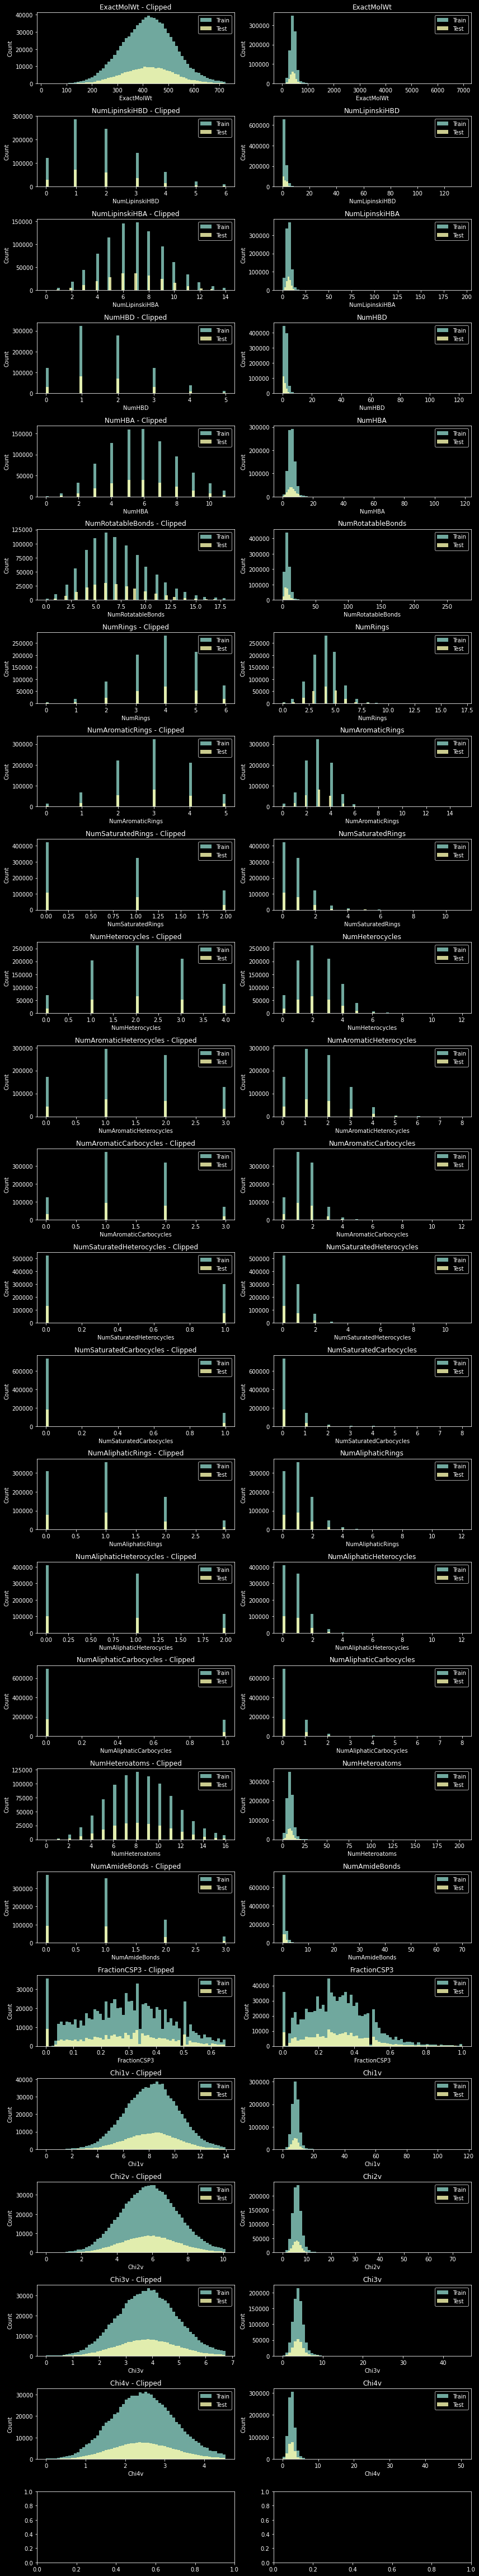

In [30]:
from tqdm import tqdm

plt.style.use('dark_background')

fig, ax = plt.subplots(len(train.columns), 
                       2, 
                       figsize=(12,64))

for i, ax_ in tqdm(zip(train.columns, ax), 
                   total=len(train.columns)-1):
    if i != 'smiles':
        c_ = train[i]
        c = c_.loc[c_ < (c_.mean() + (2*c_.std()))]
        d_ = test[i]
        d = d_.loc[d_ < (d_.mean() + (2*d_.std()))]
        ax_[0].hist(c, bins=64, alpha=0.8, label='Train')
        ax_[0].hist(d, bins=64, alpha=0.8, label='Test' )
        ax_[0].set_title(i.replace('Calc','') + ' - Clipped')
        ax_[0].set_ylabel('Count')
        ax_[0].set_xlabel(i.replace('Calc',''))
        ax_[0].legend()
        ax_[1].hist(c_, bins=64, alpha=0.8, label='Train')
        ax_[1].hist(d_, bins=64, alpha=0.8, label='Test' )
        ax_[1].set_title(i.replace('Calc',''))
        ax_[1].set_ylabel('Count')
        ax_[1].set_xlabel(i.replace('Calc',''))
        ax_[1].legend()
        
plt.tight_layout()
plt.show()